# DSAC2 세번째날

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
path = 'c:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False


power = pd.read_excel('D:/DSAC/시도별_용도별.xls')
#power.head()

In [70]:
power.set_index('구분', inplace=True)  #1열을 id 대신 구분(지역명)으로 바꾸기
#power.head()

In [71]:
power0 = power.drop(['합계','개성'])     #결측치 및 합계 행 지우기
power0 = power0.drop('합계', axis = 1)   #합계 열 지우기

## scatter plot

Text(0.5,1,'power0')

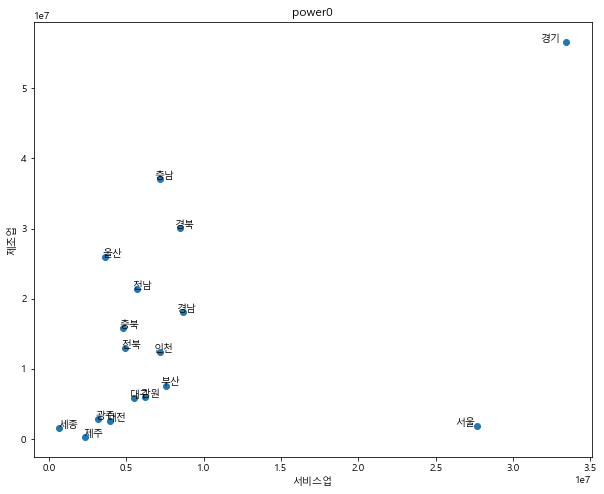

In [115]:
plt.figure(figsize=(10,8))
plt.scatter(power0['서비스업'],power0['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power0.shape[0]):
    plt.text(power0['서비스업'][n]*0.95,power0['제조업'][n], power0.index[n])
    
plt.title('power0')

In [118]:
power1=power0.drop(['서울','경기'])

Text(0.5,1,'power1')

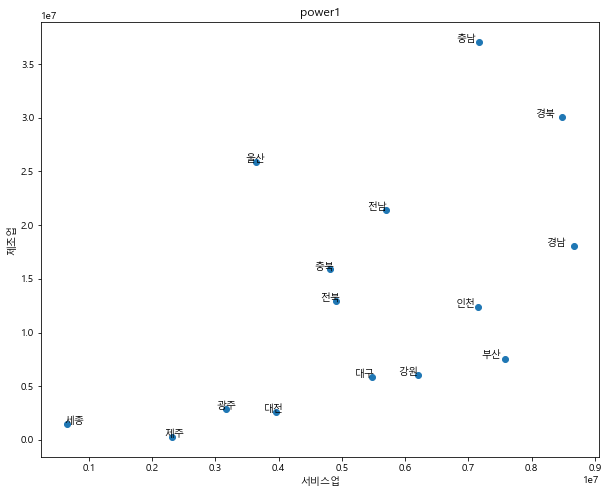

In [120]:
plt.figure(figsize=(10,8))
plt.scatter(power1['서비스업'],power1['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power1.shape[0]):
    plt.text(power1['서비스업'][n]*0.95,power1['제조업'][n], power1.index[n])
    
plt.title('power1')

## boxplot

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text xticklabel objects>)

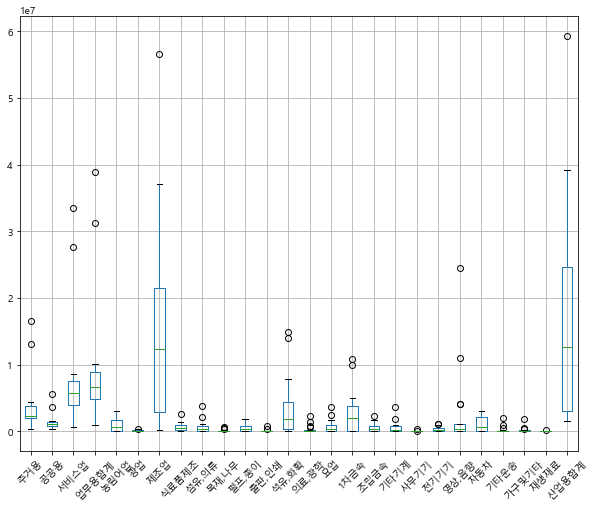

In [96]:
plt.figure(figsize=(10,8))
power0.boxplot()
plt.xticks(rotation=45)

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

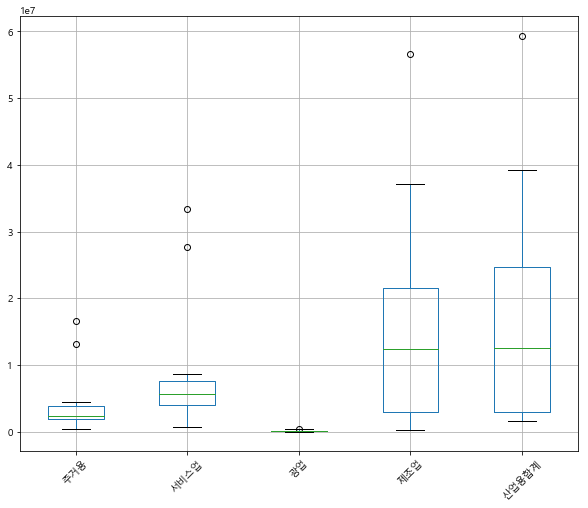

In [103]:
plt.figure(figsize=(10,8))
power0[['주거용','서비스업','광업','제조업','산업용합계']].boxplot()
plt.xticks(rotation=45)

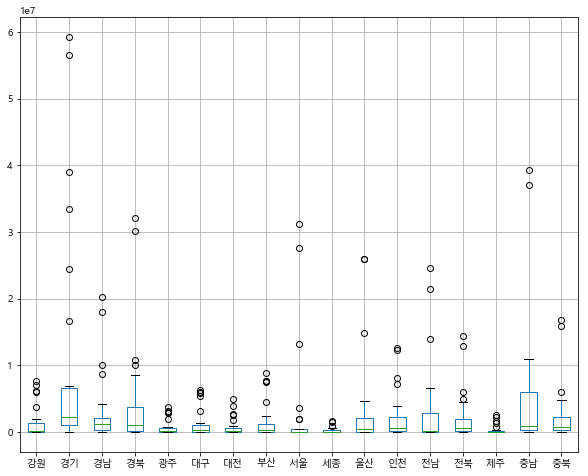

In [101]:
plt.figure(figsize=(10,8))
power0.T.boxplot()

## barh plot

<Figure size 360x720 with 0 Axes>

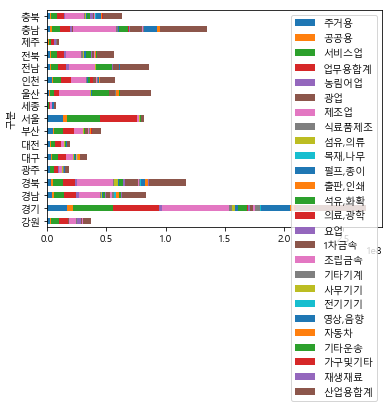

In [107]:
plt.figure(figsize=(5,10))
power0.plot(kind='barh',stacked=True)

# clustering 연습

1. linkage
2. k-means

### 1. linkage

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [62.5, 62.5, 100.0, 100.0],
  [23.75, 23.75, 81.25, 81.25],
  [5.0, 5.0, 52.5, 52.5],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [28.75, 28.75, 137.5, 137.5]],
 'dcoord': [[0.0, 5695128.446028237, 5695128.446028237, 0.0],
  [0.0, 7774288.197616207, 7774288.197616207, 5695128.446028237],
  [0.0, 11900366.468844535, 11900366.468844535, 7774288.197616207],
  [0.0, 4802848.110011704, 4802848.110011704, 0.0],
  [0.0, 5377734.408717577, 5377734.408717577, 4802848.110011704],
  [0.0, 1710061.974984825, 1710061.974984825, 0.0],
  [0.0, 3043246.288119481, 3043246.288119481, 0.0],
  [1710061.974984825, 6149436.039806739, 6149436.039806739, 3043246.288119481],
  [5377734.40

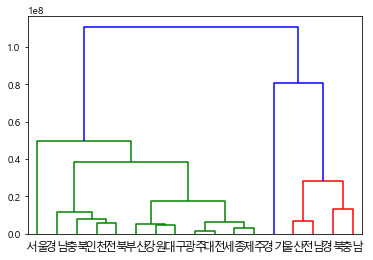

In [123]:
link_dist = linkage(power0, metric='euclidean', method='ward')
#link_dist
dendrogram(link_dist, labels=power0.index)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [40.0, 40.0, 72.5, 72.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [56.25, 56.25, 103.75, 103.75],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [80.0, 80.0, 150.0, 150.0],
  [15.0, 15.0, 115.0, 115.0],
  [5.0, 5.0, 65.0, 65.0]],
 'dcoord': [[0.0, 1710061.974984825, 1710061.974984825, 0.0],
  [0.0, 3043246.288119481, 3043246.288119481, 0.0],
  [1710061.974984825, 4348307.924220294, 4348307.924220294, 3043246.288119481],
  [0.0, 4802848.110011704, 4802848.110011704, 0.0],
  [0.0, 4657254.6127551105, 4657254.6127551105, 4802848.110011704],
  [4348307.924220294,
   9343072.809294693,
   9343072.809294693,
   4657254.6127551105],
  [0.0, 5695128.446028237, 5695128.446028237, 0.0],
  [0.0, 6732731.075477173, 6732731.075477173, 5695128.4

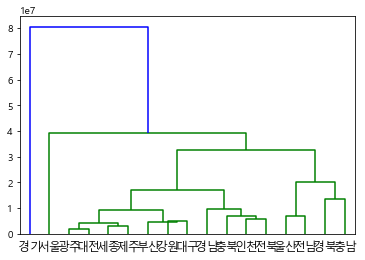

In [124]:
link_dist = linkage(power0, metric='euclidean', method='centroid')  #중심을 기준으로 군집화
dendrogram(link_dist, labels=power0.index)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [36.25, 36.25, 83.75, 83.75],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [60.0, 60.0, 130.0, 130.0]],
 'dcoord': [[0.0, 1710061.974984825, 1710061.974984825, 0.0],
  [0.0, 3043246.288119481, 3043246.288119481, 0.0],
  [1710061.974984825, 4348307.924220294, 4348307.924220294, 3043246.288119481],
  [0.0, 4802848.110011704, 4802848.110011704, 0.0],
  [0.0, 4657254.6127551105, 4657254.6127551105, 4802848.110011704],
  [4348307.924220294,
   9343072.809294693,
   9343072.809294693,
   4657254.6127551105],
  [0.0, 5695128.446028237, 5695128.446028237, 0.0],
  [0.0, 6732731.075477173, 6732731.075477173, 5695128.446028237],
  [0.0, 9716608.53359852, 9716608.53359852, 6732731.075

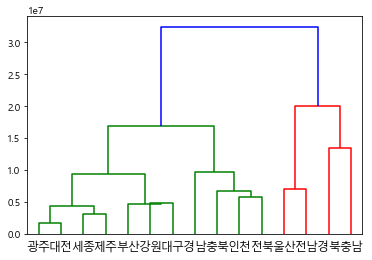

In [165]:
link_dist = linkage(power1, metric='euclidean', method='centroid')  #중심을 기준으로 군집화
dendrogram(link_dist, labels=power1.index)

### 2. k-means
KMeans()

In [130]:
from sklearn.cluster import KMeans

In [163]:
k = KMeans(n_clusters=4)
k.fit(power0)

print(k.labels_)#, print(k.cluster_centers_)

[2 1 0 0 2 2 2 2 3 2 0 2 0 2 2 0 2]


In [164]:
power0['클러스터종류'] = k.labels_
power0['클러스터종류']

구분
강원    2
경기    1
경남    0
경북    0
광주    2
대구    2
대전    2
부산    2
서울    3
세종    2
울산    0
인천    2
전남    0
전북    2
제주    2
충남    0
충북    2
Name: 클러스터종류, dtype: int32

In [166]:
k = KMeans(n_clusters=4)
k.fit(power1)
power1['클러스터종류'] = k.labels_
power1['클러스터종류']

구분
강원    0
경남    3
경북    2
광주    0
대구    0
대전    0
부산    0
세종    0
울산    1
인천    3
전남    1
전북    3
제주    0
충남    2
충북    3
Name: 클러스터종류, dtype: int32

In [168]:
power2 = power0.drop(['클러스터종류'], axis=1)

#power2.columns

Text(0.5,1,'power0')

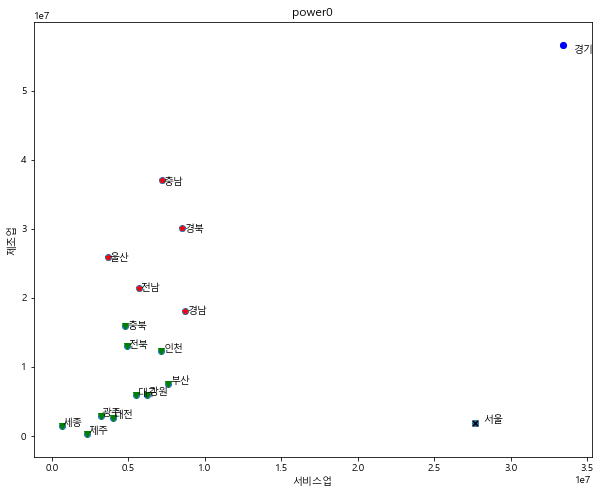

In [179]:
plt.figure(figsize=(10,8))
plt.scatter(power0['서비스업'],power0['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

my_marker = ['*','o','v','x']
my_colors = ['r','b','g','k']

for i in range(4):
    t = power0['클러스터종류']
    xs = power0['서비스업'][t==i]
    ys = power0['제조업'][t==i]
    plt.scatter(xs, ys, marker=my_marker[i], c = my_colors[i])


for n in range(power0.shape[0]) :
    plt.text(power0['서비스업'][n]*1.02, power0['제조업'][n]*0.98, power0.index[n])
    
plt.title('power0')

Text(0.5,1,'power1')

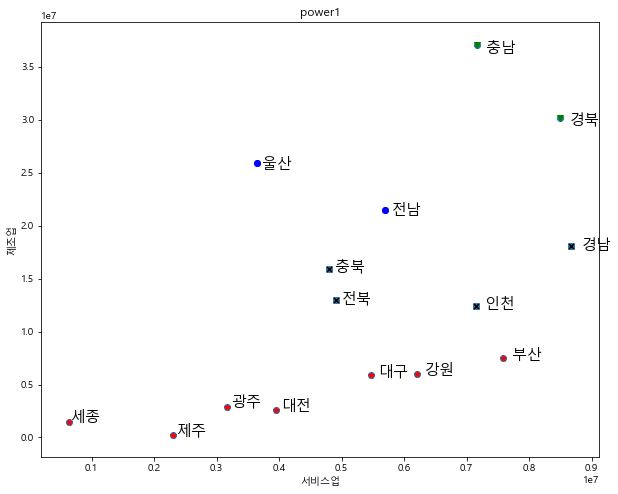

In [184]:
plt.figure(figsize=(10,8))
plt.scatter(power1['서비스업'],power1['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

my_marker = ['*','o','v','x']
my_colors = ['r','b','g','k']

for i in range(4):
    t = power1['클러스터종류']
    xs = power1['서비스업'][t==i]
    ys = power1['제조업'][t==i]
    plt.scatter(xs, ys, marker=my_marker[i], c = my_colors[i])


for n in range(power1.shape[0]) :
    plt.text(power1['서비스업'][n]*1.02, power1['제조업'][n]*0.98, power1.index[n], fontsize=15)
    
plt.title('power1')

# 
### 오후
### lab 4,5 : classification, performance analysis(regression, classification)


------------
**data**는
> training 

> validation

> test

로 나뉜다.

------------